# <p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Mini EDA Poject 📉<i class="em em-chart_with_downwards_trend" aria-role="presentation" aria-label="CHART WITH DOWNWARDS TREND"></i></b></p> 

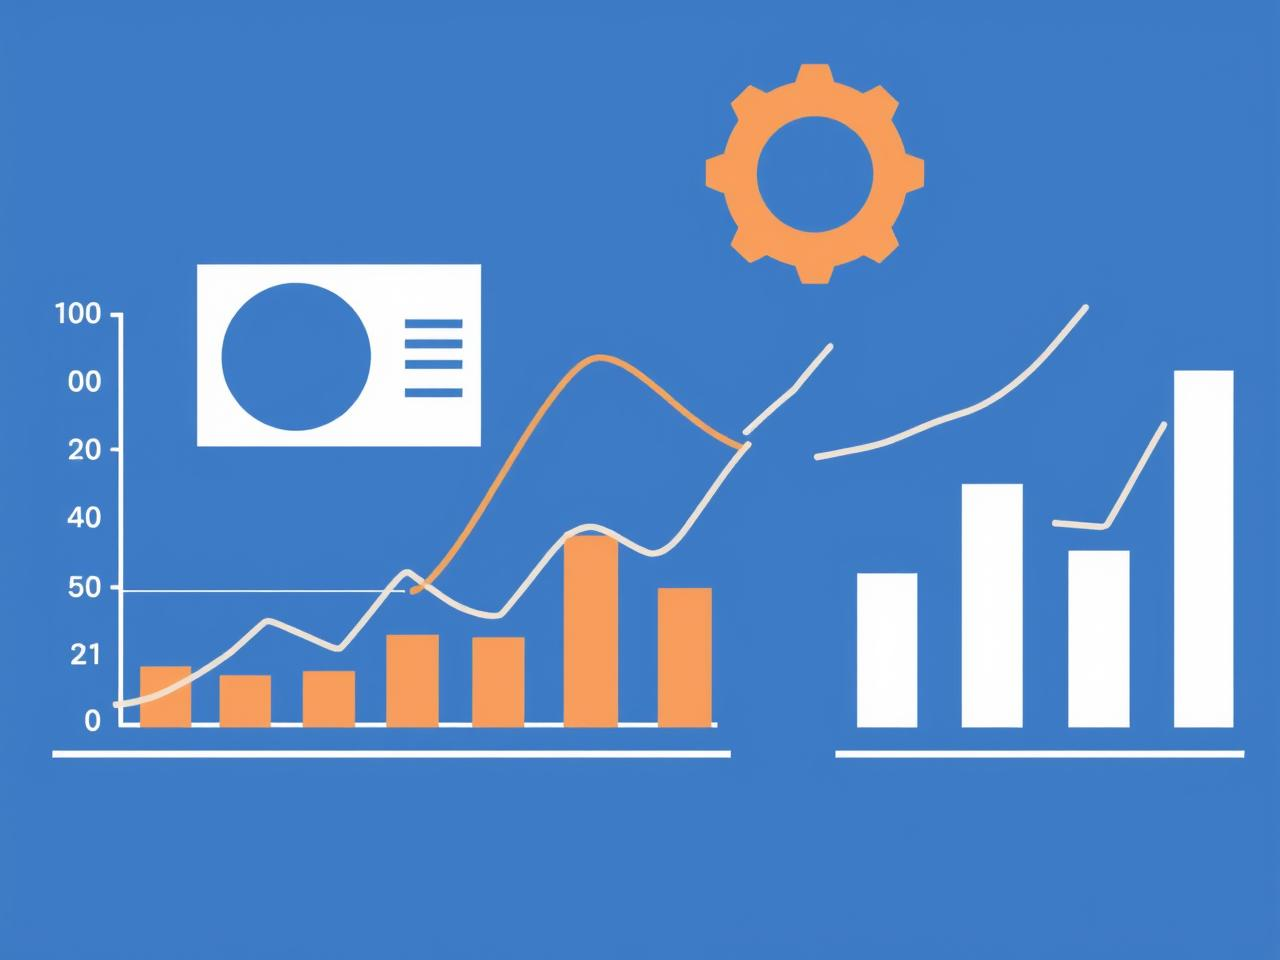

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os

## concating the datas

In [3]:
names = [name for name in os.listdir("./Sales_Data")]

data_of_year = pd.DataFrame()

for name in names:
    df = pd.read_csv("./Sales_Data/" + name)
    data_of_year = pd.concat([data_of_year, df])
    
data_of_year.to_csv("data_of_whole_year.csv",index = False)    

In [4]:
df = pd.read_csv("data_of_whole_year.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## clean up the data

In [9]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
df[df.isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
186845,NaN,NaN,NaN,NaN,NaN,NaN
186846,NaN,NaN,NaN,NaN,NaN,NaN
186847,NaN,NaN,NaN,NaN,NaN,NaN
186848,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.dropna(how= 'all')

## delete string values in order_month 

In [12]:
df = df[df["Order Date"].str[0:2] != 'Or']

## converting columns to the correct type

In [13]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int) 
df["Price Each"] = df["Price Each"].astype(float) 

## rename the columns 

In [14]:
df.columns = ['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address']

In [15]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## add month column

In [16]:
df["order_month"] = df["order_date"].str.split("/").str.get(0)
df["order_month"] = df["order_month"].astype(int)

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'])

C:\Users\Fatih YAVUZ\AppData\Local\Temp\ipykernel_61576\2765250300.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


## add a sales column

In [18]:
df['sales'] = df["price_each"] * df["quantity_ordered"]
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [19]:
df['city'] = (df.purchase_address.str.split(",").str.get(1)) + " " + ((df.purchase_address.str.split(",").str.get(2)).str.split(" ").str.get(1))


In [20]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [21]:
x = df.groupby("order_month")["sales"].sum().sort_values(ascending =False)
x

order_month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: sales, dtype: float64

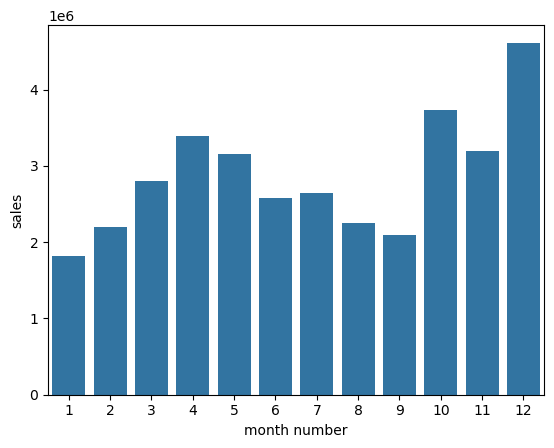

In [22]:
sns.barplot( x = x.index, y=x.values)
plt.xlabel('month number')
plt.ylabel('sales')
plt.show()

In [23]:
result = df.groupby("city")["sales"].sum().sort_values(ascending =False)
result

city
San Francisco CA    8262203.91
Los Angeles CA      5452570.80
New York City NY    4664317.43
Boston MA           3661642.01
Atlanta GA          2795498.58
Dallas TX           2767975.40
Seattle WA          2747755.48
Portland OR         1870732.34
Austin TX           1819581.75
Portland ME          449758.27
Name: sales, dtype: float64

C:\Users\Fatih YAVUZ\AppData\Local\Temp\ipykernel_50200\1143010872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index,y=result.values, palette="viridis" )


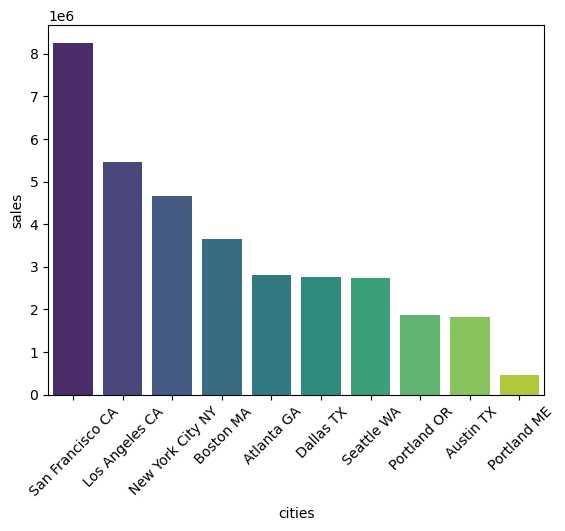

In [22]:
sns.barplot(x=result.index,y=result.values, palette="viridis" )
plt.xticks(rotation=45)
plt.xlabel("cities")
plt.ylabel("sales")
plt.show()

## creating hour column

In [25]:
df['hour'] = df['order_date'].dt.hour

In [26]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [27]:
hours = [hour for hour, df in df.groupby('hour')]

In [37]:
hourly_sales = df.groupby('hour').size()

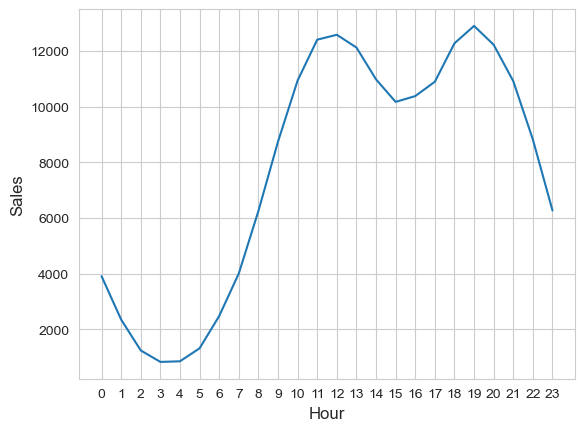

In [46]:
sns.set_style('whitegrid')
sns.lineplot(x= hourly_sales.index , y= hourly_sales.values )
plt.xticks(hourly_sales.index)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)
plt.show()

In [60]:
df2 = df[df['order_id'].duplicated(keep= False)]

df2['saled_together'] = df2.groupby('order_id')['product'].transform(lambda x: ','.join(x))

df2 = df2[['order_id','saled_together']].drop_duplicates()

df2.head()

C:\Users\Fatih YAVUZ\AppData\Local\Temp\ipykernel_61576\280367011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['saled_together'] = df2.groupby('order_id')['product'].transform(lambda x: ','.join(x))


,order_id,saled_together
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


## the most sold product 

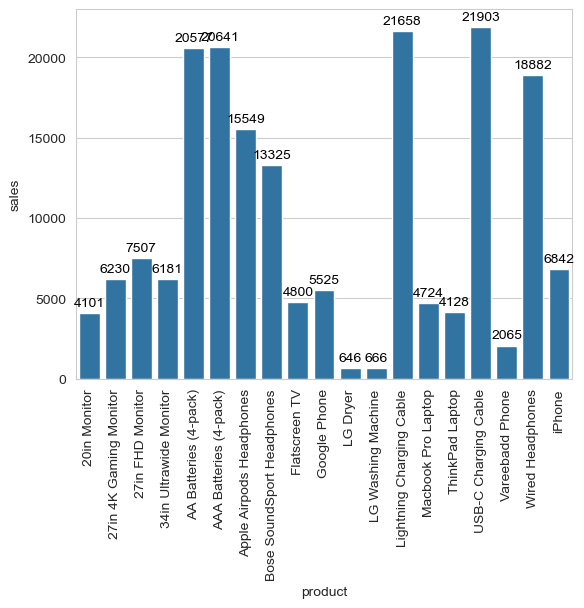

In [67]:
group = df.groupby('product').size()
ax = sns.barplot(x = group.index, y = group.values)
plt.ylabel('sales')
plt.xticks(rotation ='vertical')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

In [87]:
prices = df.groupby('product')['price_each'].mean()
index = df.groupby('product')['price_each'].mean().index
values = df.groupby('product')['price_each'].mean().values

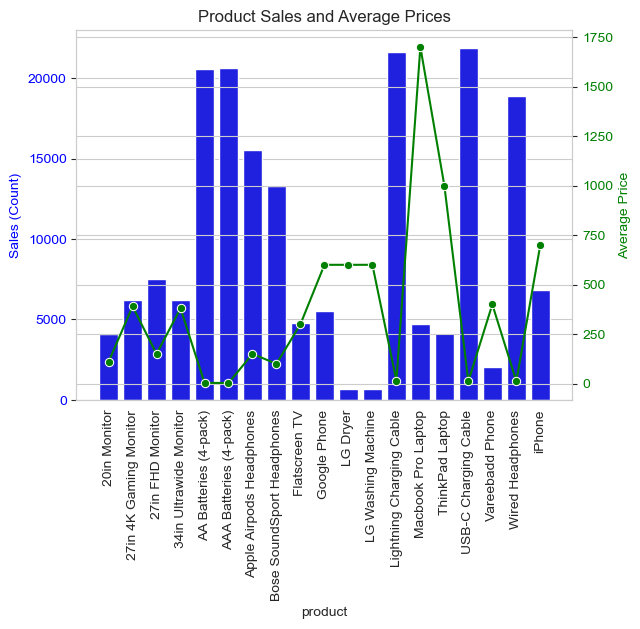

In [91]:
fig, ax1 = plt.subplots()

sns.barplot(x=group.index, y=group.values, ax=ax1, color='blue')
ax1.set_ylabel('Sales (Count)', color='blue')  
ax1.tick_params(axis='y', labelcolor='blue') 
plt.xticks(rotation='vertical')


ax2 = ax1.twinx() 
sns.lineplot(x=prices.index, y=prices.values, ax=ax2, color='green', marker="o")
ax2.set_ylabel('Average Price', color='green') 
ax2.tick_params(axis='y', labelcolor='green')  

plt.title("Product Sales and Average Prices")
plt.show()

## visualizing correlations

In [6]:
numeric_df = df.select_dtypes(exclude ="O")

In [7]:
sns.heatmap(numeric_df.corr(),annot =True, cmap='coolwarm')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity